In [1]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np

/home/xp/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
dataset_location = '/home/xp/trafficclassifier/dataset/'
ping_df = pd.read_csv(dataset_location+'ping_training_data.csv', delimiter='\t')
ping_df = ping_df.sample(n=25000, random_state=1)
voice_df = pd.read_csv(dataset_location+'voice_training_data.csv', delimiter='\t')
voice_df = voice_df.sample(n=25000, random_state=1)
dns_df = pd.read_csv(dataset_location+'dns_training_data.csv', delimiter='\t')
dns_df = dns_df.sample(n=25000, random_state=1)
telnet_df = pd.read_csv(dataset_location+'telnet_training_data.csv', delimiter='\t')
telnet_df = telnet_df.sample(n=25000, random_state=1)
df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)

In [4]:
df.shape

(100000, 17)

In [5]:
df.drop('Forward Packets', axis=1, inplace=True)
df.drop('Forward Bytes', axis=1, inplace=True)
df.drop('Reverse Packets', axis=1, inplace=True)
df.drop('Reverse Bytes', axis=1, inplace=True)
#convert the data of traffic type column to numeric values type double
df['Traffic Type'] = df['Traffic Type'].astype('category')
df['Traffic Type'] = df['Traffic Type'].cat.codes


 

In [6]:
print(df.shape)

(100000, 13)


In [7]:
df.describe()

,Delta Forward Packets,Delta Forward Bytes,Forward Instantaneous Packets per Second,Forward Average Packets per second,Forward Instantaneous Bytes per Second,Forward Average Bytes per second,Delta Reverse Packets,Delta Reverse Bytes,DeltaReverse Instantaneous Packets per Second,Reverse Average Packets per second,Reverse Instantaneous Bytes per Second,Reverse Average Bytes per second,Traffic Type
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.00000
mean,10.495900,969.144600,10.495900,441.757188,969.144600,5.705282e+04,158.578990,2.413798e+04,14.644380,791.189445,1683.144480,1.181817e+05,1.50000
std,29.936954,2593.686662,29.936954,1817.579347,2593.686662,2.783116e+05,2060.446505,3.319545e+05,31.580866,3177.447715,3313.378216,5.085626e+05,1.11804
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.00000
25%,0.000000,0.000000,0.000000,1.222222,0.000000,1.135556e+02,0.000000,0.000000e+00,0.000000,1.000000,0.000000,9.800000e+01,0.75000
50%,0.000000,0.000000,0.000000,69.000000,0.000000,5.615273e+03,0.000000,0.000000e+00,0.000000,121.714286,0.000000,1.038467e+04,1.50000
75%,1.000000,137.000000,1.000000,243.341772,137.000000,1.992171e+04,9.000000,7.180000e+02,5.000000,440.760000,336.000000,4.628876e+04,2.25000
max,199.000000,17563.000000,199.000000,47028.000000,17563.000000,7.348222e+06,47007.000000,7.345420e+06,199.000000,47053.000000,17563.000000,7.352172e+06,3.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Delta Forward Packets                          100000 non-null  int64  
 1   Delta Forward Bytes                            100000 non-null  int64  
 2   Forward Instantaneous Packets per Second       100000 non-null  float64
 3   Forward Average Packets per second             100000 non-null  float64
 4   Forward Instantaneous Bytes per Second         100000 non-null  float64
 5   Forward Average Bytes per second               100000 non-null  float64
 6   Delta Reverse Packets                          100000 non-null  int64  
 7   Delta Reverse Bytes                            100000 non-null  int64  
 8   DeltaReverse Instantaneous Packets per Second  100000 non-null  float64
 9   Reverse Average Packets per second    

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop('Traffic Type', axis=1)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Traffic Type'], test_size=0.2)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80000, 12) (20000, 12) (80000,) (20000,)


In [12]:
from sklearn.ensemble import RandomForestRegressor
#import neural network classifier
from sklearn.neural_network import MLPClassifier



In [13]:

model_neural = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

In [14]:

TT_nn = model_neural.fit(X_train, y_train)

### Accuracy


In [15]:
print("The training score is: ", TT_nn.score(X_train, y_train))

The training score is:  0.9898375


In [16]:
print('Features:',df.columns[:-1].values)

Features: ['Delta Forward Packets' 'Delta Forward Bytes'
 'Forward Instantaneous Packets per Second'
 'Forward Average Packets per second'
 'Forward Instantaneous Bytes per Second'
 'Forward Average Bytes per second' 'Delta Reverse Packets'
 'Delta Reverse Bytes' 'DeltaReverse Instantaneous Packets per Second'
 'Reverse Average Packets per second'
 'Reverse Instantaneous Bytes per Second'
 'Reverse Average Bytes per second']


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [18]:
ytrain_pred = TT_nn.predict(X_train)


In [19]:
#the MAE
print('MAE:', mean_absolute_error(y_train, ytrain_pred))

MAE: 0.021925


In [20]:
#the MSE
print('MSE:', mean_squared_error(y_train, ytrain_pred))

MSE: 0.05405


In [21]:
#the RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_train, ytrain_pred)))

RMSE: 0.2324865587512534


In [22]:
#The EVS
print('EVS:', explained_variance_score(y_train, ytrain_pred))

EVS: 0.9568944333425443


In [23]:
#Predicting the Test set results
ytest_pred = TT_nn.predict(X_test)

In [24]:
print(ytest_pred[:12])

[1 0 3 2 1 1 2 1 0 2 3 0]


In [25]:
#R2 score
print('R2 score:', r2_score(y_test, ytest_pred))

R2 score: 0.9574912796651487


In [26]:
#Save the model
import pickle

pickle.dump(model_neural,open('NN_Reg','wb')) #save the model


In [27]:
#use Random Forest Classifier model saved to predict a random sample
idx = 80000
model = pickle.load(open('NN_Reg','rb'))
single_x_test = [df.iloc[idx].drop('Traffic Type').tolist()]
type(single_x_test)
#check the dimensions of the single_x_test
#print the header of the dataset
print(df.columns.drop('Traffic Type'))
print(single_x_test)

Index(['Delta Forward Packets', 'Delta Forward Bytes',
       'Forward Instantaneous Packets per Second',
       'Forward Average Packets per second',
       'Forward Instantaneous Bytes per Second',
       'Forward Average Bytes per second', 'Delta Reverse Packets',
       'Delta Reverse Bytes', 'DeltaReverse Instantaneous Packets per Second',
       'Reverse Average Packets per second',
       'Reverse Instantaneous Bytes per Second',
       'Reverse Average Bytes per second'],
      dtype='object')
[[55.0, 3630.0, 55.0, 5072.0, 3630.0, 334947.0, 55.0, 4835.0, 55.0, 5080.5, 4835.0, 446003.5]]


In [28]:
single_y_test = df.iloc[idx]['Traffic Type']
single_y_test

2.0

In [29]:
# Predict the traffic type
single_prediction = model.predict(single_x_test)
single_prediction

/home/xp/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int8)

In [30]:
predictions = model.predict(X_test)
resultsDF = pd.DataFrame({
        'true':y_test,
        'predicted':predictions
    })
resultsDF.head()

,true,predicted
2391,1,1
74434,0,0
40454,3,3
89899,2,2
20285,1,1


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4961
           1       0.98      1.00      0.99      4958
           2       1.00      0.99      0.99      4931
           3       1.00      0.98      0.99      5150

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



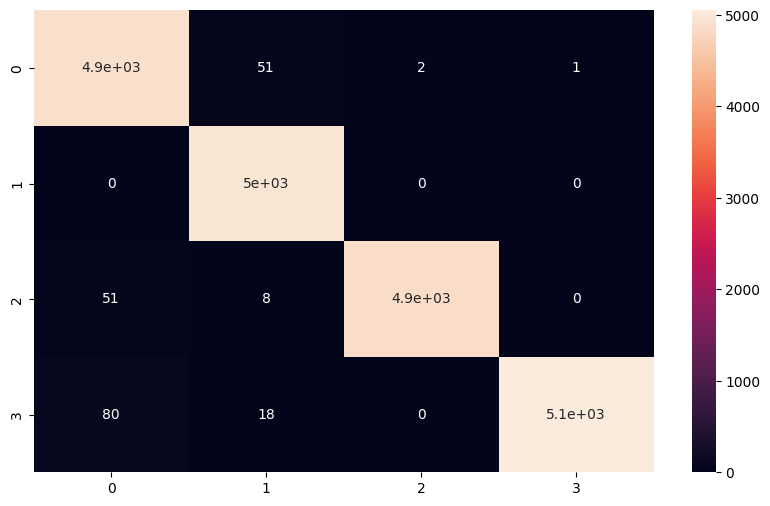

In [31]:
#import confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ytest_pred)
cm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)

from sklearn.metrics import classification_report
print(classification_report(y_test, ytest_pred))



In [32]:
#get the time response of the model when it is predicting a single sample
#use a for loop to predict 1000 random samples
time_ = []
import time
import random
start = time.time()
for i in range(1000):
    #use Random Forest Classifier model saved to predict a random sample
    idx = random.randint(0, len(df))
    model = pickle.load(open('NN_Reg','rb'))
    single_x_test = [df.iloc[idx].drop('Traffic Type').tolist()]
    #get the true value of the traffic type
    single_y_test = df.iloc[idx]['Traffic Type']
    # Predict the traffic type
    single_prediction = model.predict(single_x_test)
    #get the time response of the model when it is predicting a single sample
    end = time.time()
    time_.append(end-start)
    start = time.time()


        

/home/xp/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/xp/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/xp/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/xp/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/xp/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/xp/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid 

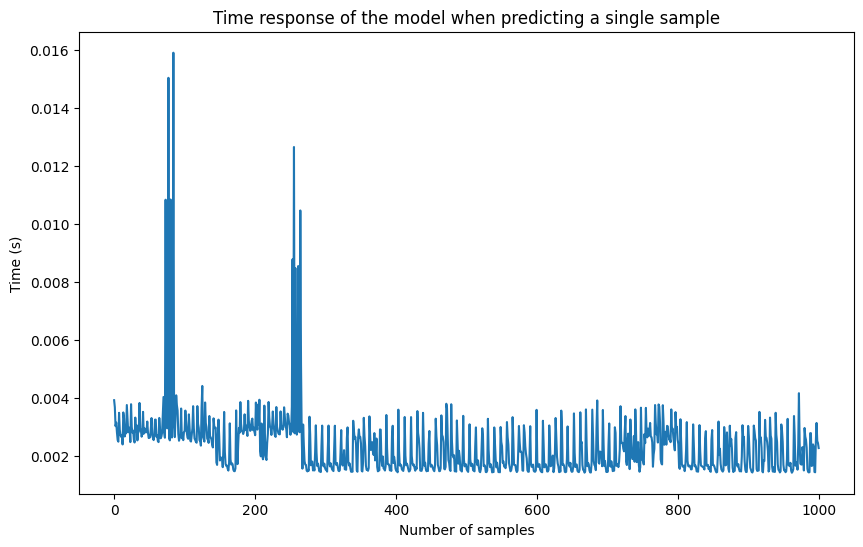

In [33]:
#use matplotlib to plot the time response
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(time_)
plt.xlabel('Number of samples')
plt.ylabel('Time (s)')
plt.title('Time response of the model when predicting a single sample')
plt.show()


In [34]:
# use K-Means clustering to cluster the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_train)
kmeans.labels_


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

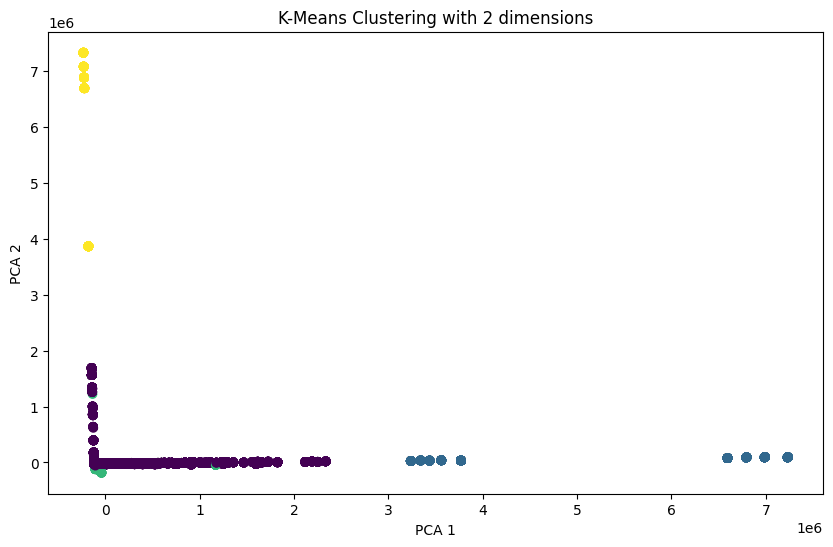

: 

: 

In [35]:
#Visualize the results on PCA-reduced data 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_train)
pca_2d = pca.transform(X_train)
plt.figure(figsize=(10,6))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clustering with 2 dimensions')
plt.show()
# Put the result into a color plot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
x_min, x_max = pca_2d[:, 0].min() - 1, pca_2d[:, 0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1, pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')
plt.plot(pca_2d[:, 0], pca_2d[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, linewidths=3, color='w', zorder=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clustering with 2 dimensions')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()